# Understanding Models 
Understanding how different kind of models and how they dehave differently on data

Quick acess :
- [Loading Data Sets](#loading-datasets)
- [Analyzing Data](#analyzing-data-sets)
  - [Analyzing Anagrams Data Set](#analyzing-anagrams-dataset)
  - [Analyzing Anscombe Data Set](#analyzing-anscombe-dataset)
  - [Analyzing Attention Data Set](#analyzing-attention-dataset)
  - [Analyzing Brain Networks Data Set](#analyzing-brainnetworks-dataset)
  - [Analyzing Car crashes Data Set](#analyzing-car-crashes-dataset)
  - [Analyzing Diamonds Data Set](#analyzing-diamonds-dataset)
  - [Analyzing Dots Data Set](#analyzing-dots-dataset)
- [Linear Regression](#linear-regression)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## use display for html output
from IPython.display import display, HTML

# auto-reload modules
%load_ext autoreload
%autoreload 2

In [3]:
#dark theme
sns.set_style("dark")
plt.style.use("dark_background")

### Loading Datasets

In [4]:
from utils import display_cols
display_cols(sns.get_dataset_names())

anagrams,anscombe,attention,brain_networks,car_crashes
diamonds,dots,exercise,flights,fmri
gammas,geyser,iris,mpg,penguins
planets,taxis,tips,titanic,


In [5]:
# load data from seaborn
data_sets = sns.get_dataset_names()
df_set = {}
for i in data_sets:
    df = sns.load_dataset(i)
    df_set[i] = df

del i, data_sets, df
    

---

### Analyzing Data sets

#### Analyzing anagrams dataset

In [6]:
from utils import analyze_cols
analyze_cols(df_set["anagrams"], no_cols=3)

subidr,attnr,num1,num2,num3


subidr    0
attnr     0
num1      0
num2      0
num3      0
dtype: int64

,subidr,attnr,num1,num2,num3
0,1,divided,2,4.0,7
1,2,divided,3,4.0,5
2,3,divided,3,5.0,6
3,4,divided,5,7.0,5
4,5,divided,4,5.0,8


In [7]:
colus = df_set.get("anagrams")['subidr']
from utils import display_cols
display_cols(colus, no_cols=10)
del colus

1,2,3,4,5,6,7,8,9,10
11,12,13,14,15,16,17,18,19,20


As we can clearly observe subidr just is the index of the entire data frame therefore we can clearly remove it as it doesn't hold any important information.

In [8]:
df_set.get("anagrams").drop(columns=['subidr'], inplace=True)
df_set.get('anagrams').head()

,attnr,num1,num2,num3
0,divided,2,4.0,7
1,divided,3,4.0,5
2,divided,3,5.0,6
3,divided,5,7.0,5
4,divided,4,5.0,8


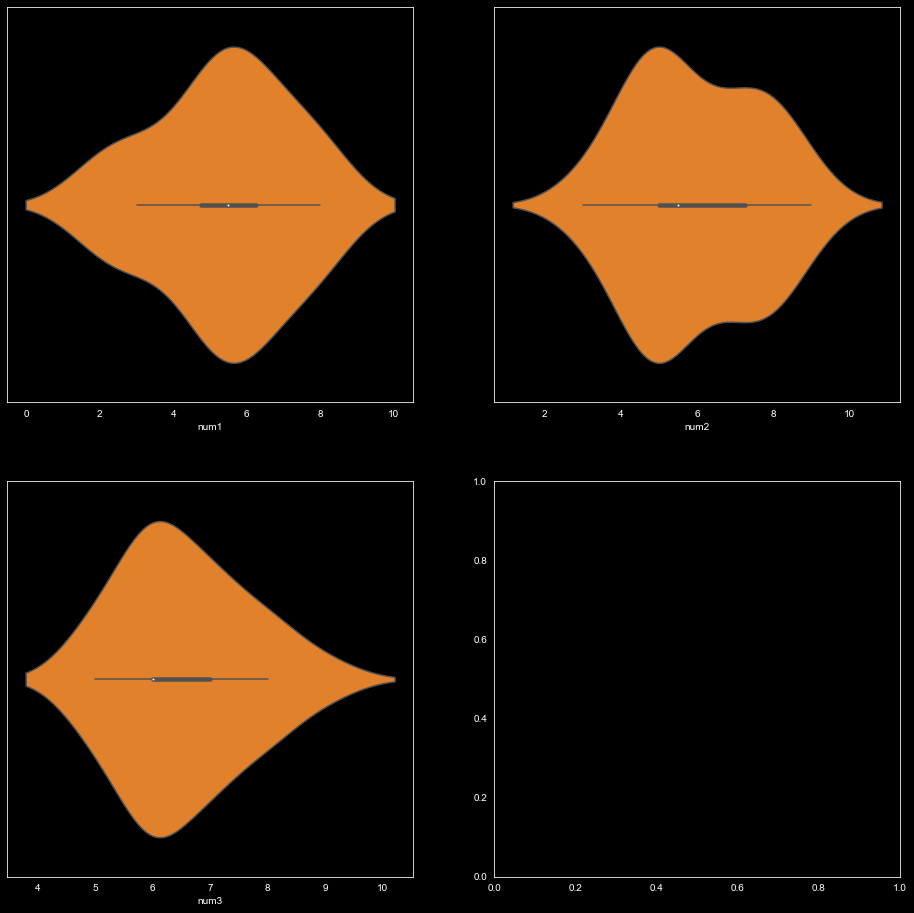

In [9]:
features = "num1 num2 num3".split()
fig, ax = plt.subplots( nrows=2, ncols=2, figsize=(16,16))
for idx, label in enumerate(features):
    sns.violinplot(x=label, 
    data=df_set["anagrams"], ax=ax[idx//2][idx%2],
    palette=["#ff7f0e"])

del features, fig, ax

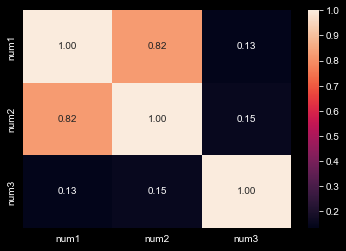

In [10]:
cm = df_set.get('anagrams').corr()
sns.heatmap(cm, annot=True, fmt='.2f')

del cm

From this heat map we can see that the num1 and num2 are the ones that have the most correlation with the each other so they can be removed.

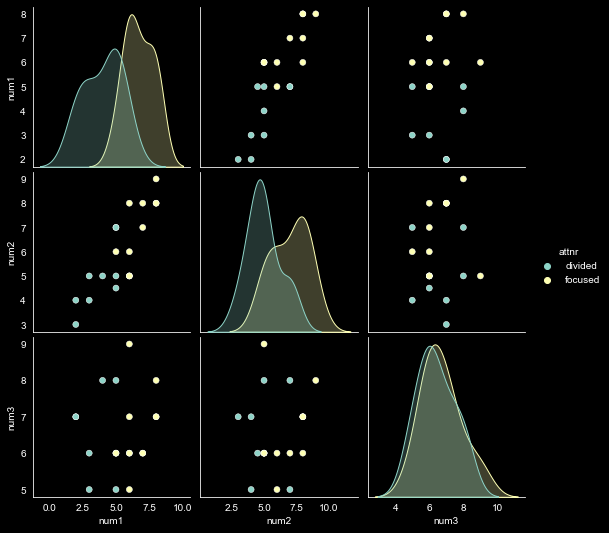

In [11]:
sns.pairplot(df_set.get('anagrams'), hue='attnr')

Features: num1, num3

Dependent variable: attnr

<AxesSubplot:xlabel='num1', ylabel='num3'>

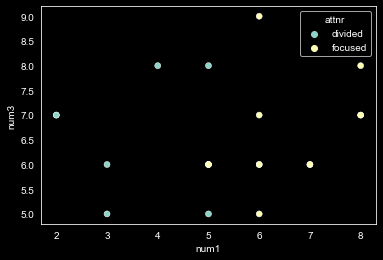

In [12]:
sns.scatterplot(x='num1', y='num3',hue='attnr', data=df_set.get('anagrams'))

Visually we can distinguish the two classes of data are forming some kind of clusters.

---

#### Analyzing anscombe dataset

In [13]:
from utils import analyze_cols
analyze_cols(df_set.get('anscombe'))

dataset,x,y,,


dataset    0
x          0
y          0
dtype: int64

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


8.84,2
8.04,1
5.73,1
12.74,1
7.11,1


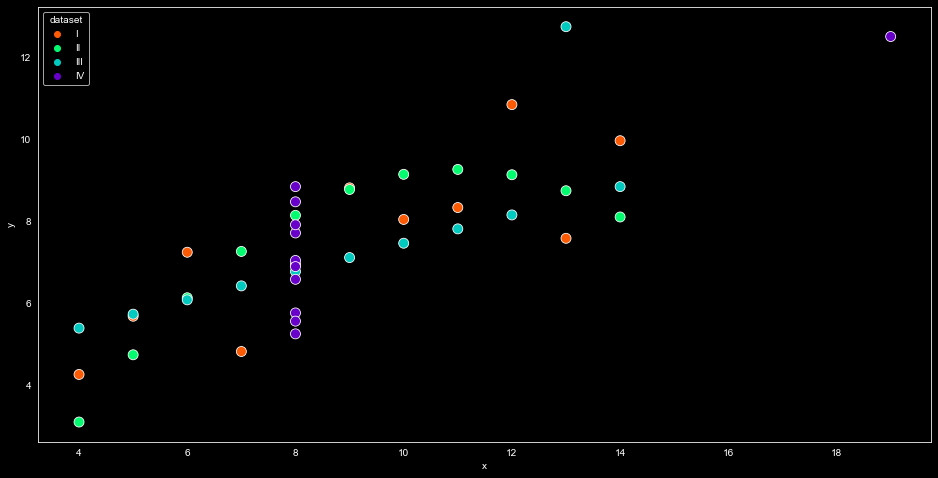

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,8))
sns.scatterplot(x='x', y='y',hue='dataset',
    data=df_set.get('anscombe'), ax = ax,
    palette=['#fc5a03', '#03fc6f', '#00c9bf', '#6800c9'], s=100)

del fig, ax

This is a really challanging data set as there isn't a clear way to differentiate between the classes. From the plot alone we are able to see that the data is not normally distributed. Let's see if any columns are corelated with each other.

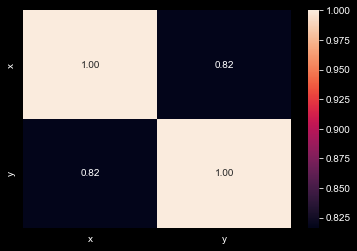

In [15]:
cm = df_set.get('anscombe').corr()
sns.heatmap(cm, annot=True, fmt='.2f')

del cm

It seems that y is highly co-reated with x. Let's see if we can use this to predict the data.

#### Analyzing attention dataset

In [16]:
from utils import analyze_cols
analyze_cols(df_set.get('attention'), no_cols=3)

Unnamed: 0,subject,attention,solutions,score


Unnamed: 0    0
subject       0
attention     0
solutions     0
score         0
dtype: int64

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0


we can observe that unnamed0 is just the index of the columns therfore we can remove it

In [17]:
df_set.get('attention').drop(columns=['Unnamed: 0'], inplace=True)
df_set.get('attention').head()

,subject,attention,solutions,score
0,1,divided,1,2.0
1,2,divided,1,3.0
2,3,divided,1,3.0
3,4,divided,1,5.0
4,5,divided,1,4.0


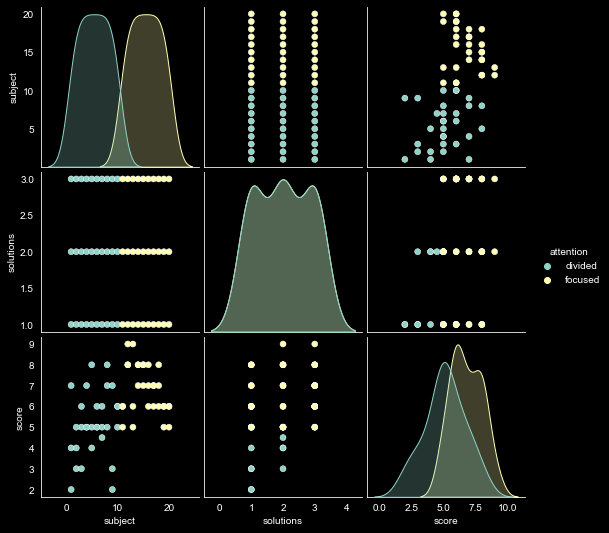

In [18]:
sns.pairplot(df_set.get('attention'), hue='attention')

Since there is a clear distinction between the classes we can use this to predict the data.

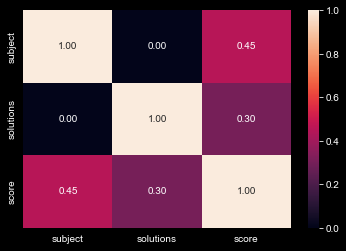

In [19]:
cm = df_set.get('attention').corr()
sns.heatmap(cm, annot=True, fmt='.2f')

del cm

From the heat map we can see that the features aren't highly corelated therefore there isn't a need to remove any data

#### Analyzing brain_networks dataset

In [20]:
from utils import analyze_cols
analyze_cols(df_set.get('brain_networks'), show_feature_info=False, no_cols=3, features_no_cols=15)

network,1,1.1,2,2.1,3,3.1,4,4.1,5,5.1,6,6.1,6.2,6.3
7,7.1,7.2,7.3,7.4,7.5,8,8.1,8.2,8.3,8.4,8.5,9,9.1,10
10.1,11,11.1,12,12.1,12.2,12.3,12.4,13,13.1,13.2,13.3,13.4,13.5,14
14.1,15,15.1,16,16.1,16.2,16.3,16.4,16.5,16.6,16.7,17,17.1,17.2,17.3
17.4,17.5,17.6,,,,,,,,,,,,


network    1
1          1
1.1        1
2          1
2.1        1
          ..
17.2       1
17.3       1
17.4       1
17.5       1
17.6       1
Length: 63, dtype: int64

,network,1,1.1,2,2.1,3,3.1,4,4.1,5,...,16.5,16.6,16.7,17,17.1,17.2,17.3,17.4,17.5,17.6
0,node,1,1,1,1,1,1,1,1,1,...,3,4,4,1,1,2,2,3,3,4
1,hemi,lh,rh,lh,rh,lh,rh,lh,rh,lh,...,rh,lh,rh,lh,rh,lh,rh,lh,rh,lh
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,56.05574417114258,92.03103637695312,3.391575574874878,38.65968322753906,26.203819274902344,-49.71556854248047,47.4610366821289,26.746612548828125,-35.898860931396484,...,0.6079040169715881,-70.27054595947266,77.36577606201172,-21.73455047607422,1.0282527208328247,7.7917842864990225,68.90372467041016,-10.520872116088867,120.49046325683594,-39.686431884765625
4,1,55.5472526550293,43.6900749206543,-65.49598693847656,-13.974522590637207,-28.27496337890625,-39.05012893676758,-1.2106596231460571,-19.012897491455078,19.568010330200195,...,57.49507141113281,-76.39321899414062,127.26136016845705,-13.035799026489258,46.3818244934082,-15.752449989318848,31.00033187866211,-39.607521057128906,24.76401138305664,-36.7710075378418


In [21]:
df_set.get('brain_networks').iloc[0].unique()

array(['node', '1', '2', '3', '4'], dtype=object)

In [22]:
df_set.get('brain_networks').iloc[1].unique()

array(['hemi', 'lh', 'rh'], dtype=object)

It's hard to understand this data without precontext !

#### Analyzing car crashes dataset

In [23]:
from utils import analyze_cols
analyze_cols(df_set.get('car_crashes'), no_cols=3)

total,speeding,alcohol,not_distracted,no_previous
ins_premium,ins_losses,abbrev,,


total             0
speeding          0
alcohol           0
not_distracted    0
no_previous       0
ins_premium       0
ins_losses        0
abbrev            0
dtype: int64

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


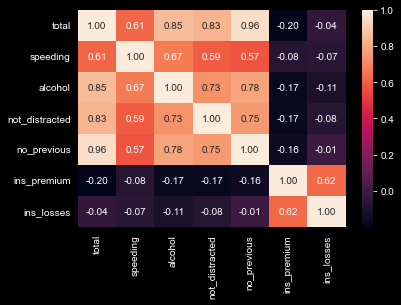

In [24]:
cm = df_set.get('car_crashes').corr()
sns.heatmap(cm, annot=True, fmt='.2f')

del cm

From the above heat map we can observe that ins_premium & ins_losses **aren't highly corelated** with total (which is the dependent variable). while the other features are corelated with each other.

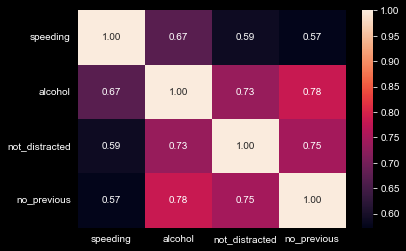

In [25]:
test_df = df_set.get('car_crashes').drop(columns=['ins_losses', 'ins_premium', 'total'])
cm = test_df.corr()
sns.heatmap(cm, annot=True, fmt='.2f')

del test_df, cm

All other features are **co-realted** with each other

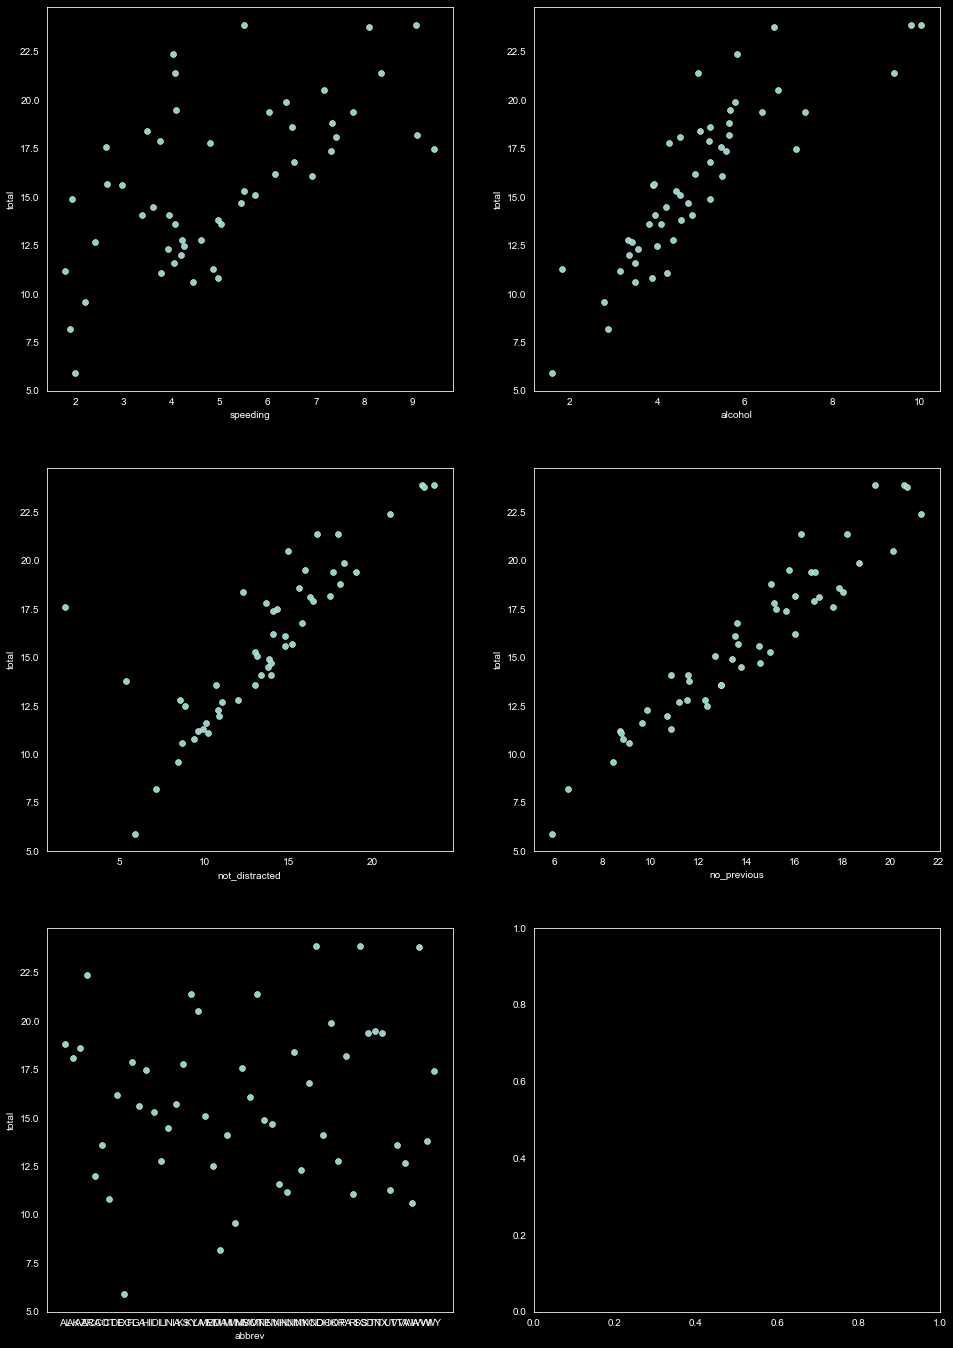

In [26]:
test_df = df_set.get('car_crashes').drop(columns=['ins_losses', 'ins_premium'])
cols = test_df.columns.tolist()
cols.remove('total')

num_rows = (len(cols)+1)//2
fig, ax = plt.subplots(nrows=num_rows, ncols=2, figsize=(16,8*num_rows))

for idx, col in enumerate(cols):
    sns.scatterplot(x=col, y='total', data=test_df, ax=ax[idx//2][idx%2])

del idx, col, cols, test_df
del fig, ax, num_rows

We can observe a linear realtion ship of total with all the other features except abbrev. 

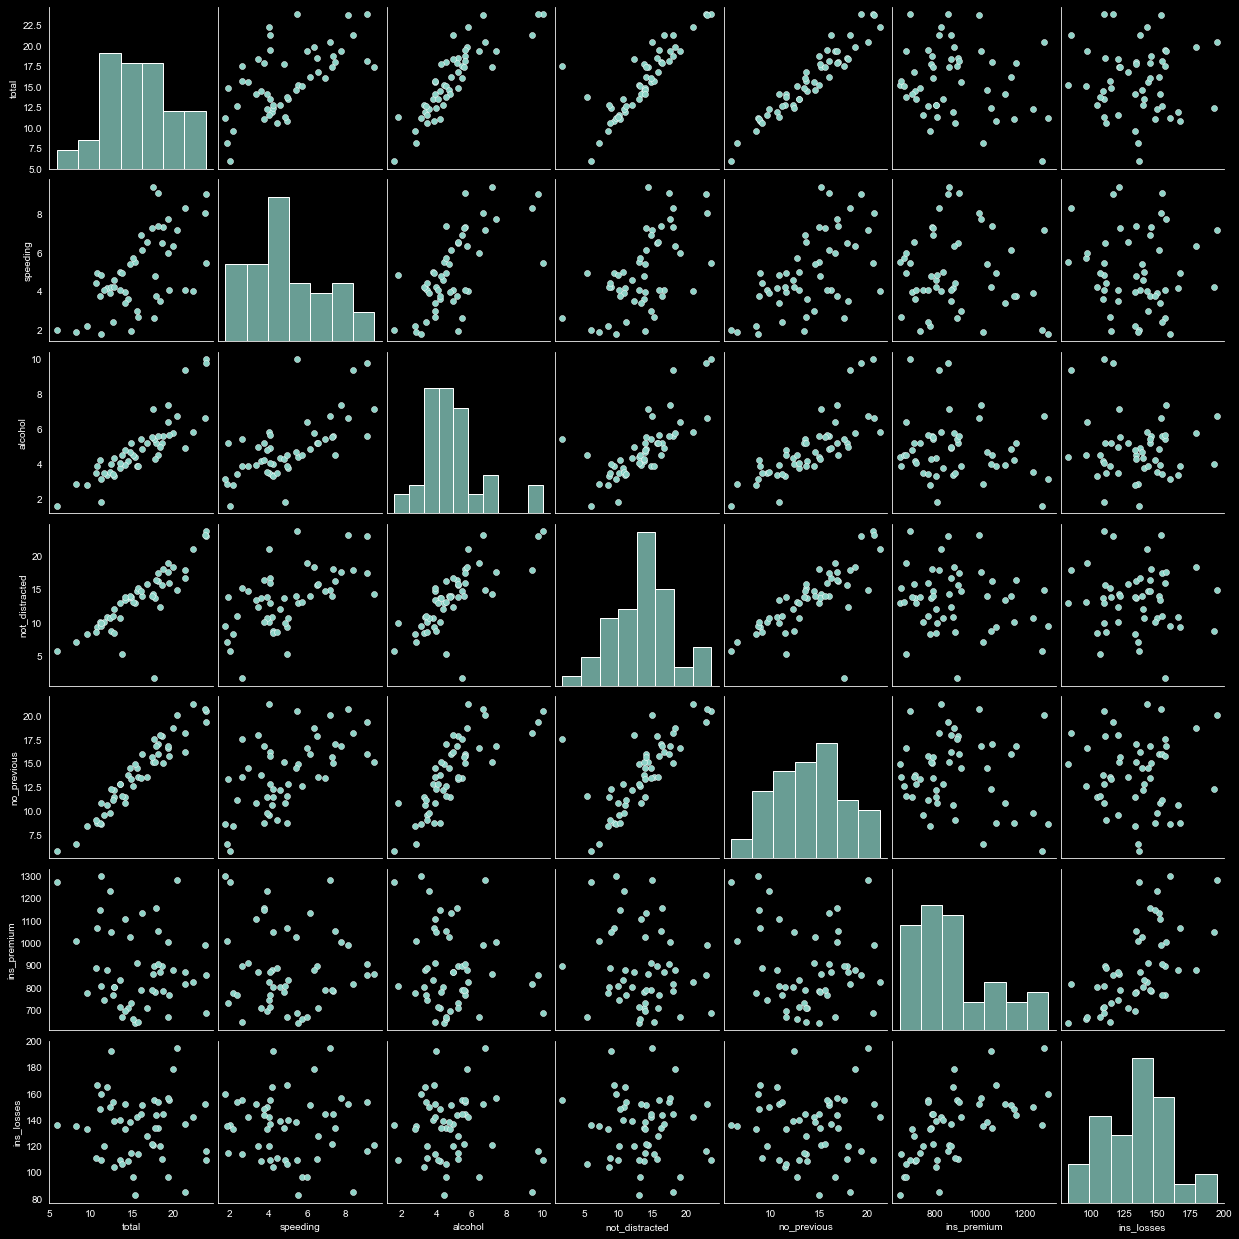

In [27]:
sns.pairplot(df_set.get('car_crashes'))

- As we have observed above we can come to the same conclusion that ins_premium & ins_losses are not highly corelated with total.
- All other features expcept abbrev are highly corelated with each other & total.

#### Analyzing diamonds dataset

In [28]:
from utils import analyze_cols
analyze_cols(df_set.get('diamonds'), no_cols=3)

carat,cut,color,clarity,depth
table,price,x,y,z


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


2.70,767
2.69,748
2.71,738
2.68,730
2.72,697


<AxesSubplot:xlabel='cut', ylabel='price'>

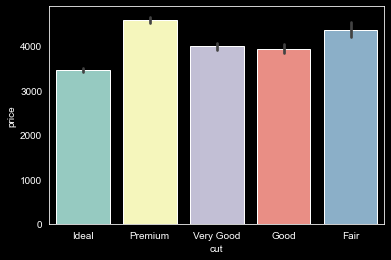

In [33]:
sns.barplot(x='cut', y='price', data=df_set.get('diamonds'))

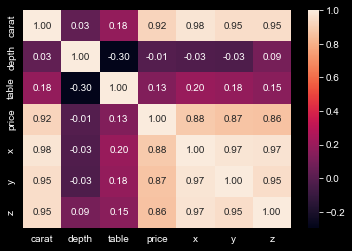

In [36]:
cm = df_set.get('diamonds').corr()
sns.heatmap(cm, annot=True, fmt='.2f')

del cm

In [61]:
def str_table(s: str)->str:
    """Converts String to HTML table string"""
    temp_func = lambda x: "".join([f"<td>{ele}</td>" for ele in x])
    table = [f"<tr>{temp_func(i.split())}</tr>"
         for i in str(s).split('\n')]
    return "".join(table) 
   
desc_depth = df_set.get('diamonds')['depth'].describe()
# Last ele is just info therefore remove it 
table_depth = str_table(desc_depth[:-1])

desc_table = df_set.get('diamonds')['table'].describe()
# Last ele is just info therefore remove it 
table_table = str_table(desc_table[:-1])

desc_carat = df_set.get('diamonds')['carat'].describe()
# Last ele is just info therefore remove it 
table_carat = str_table(desc_carat[:-1])

display(HTML(f'''<table>
    <tr>
        <td style="text-align:left;"><h3>Depth</h3><table>{table_depth}</table></td>
        <td style="text-align:left;"><h3>Table</h3><table>{table_table}</table></td>
        <td style="text-align:left;"><h3>Carat</h3><table>{table_carat}</table></td>
    </tr>
</table>'''))

del table_depth, desc_depth, str_table

**Correlation**: $r_{xy}=\frac{cov_{x,y}}{\sigma_x\sigma_y}$

Where:
- $cov_{x,y}$ = covaraince of x, y.
- $\sigma_x$ = standard deviation of x
- $\sigma_y$ = standard deviation of y

---

**Covariance**: $cov_{x,y}=\frac{\sum(x_{i}-\bar{x})(y_{i}-\bar{y})}{n-1}$

Where:

- $x_i$ = a given x value in the data set
- $y_i$ = the y value in the data set that corresponds with $x_i$
- $\bar{x}$	= mean of x
- $\bar{y}$	= mean of y
- $n$ = no. of observations

--- 

**Standard deviation**: $\sigma_x=\sqrt{\frac{\sum(x_{i}-\bar{x})^2}{n}}$

In [39]:
df_set.get('diamonds')['table'].describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

#### Analyzing dots dataset

In [ ]:
from utils import analyze_cols
analyze_cols(df_set['dots'], no_cols=3, features_no_cols=3)

align,choice,time
coherence,firing_rate,


,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


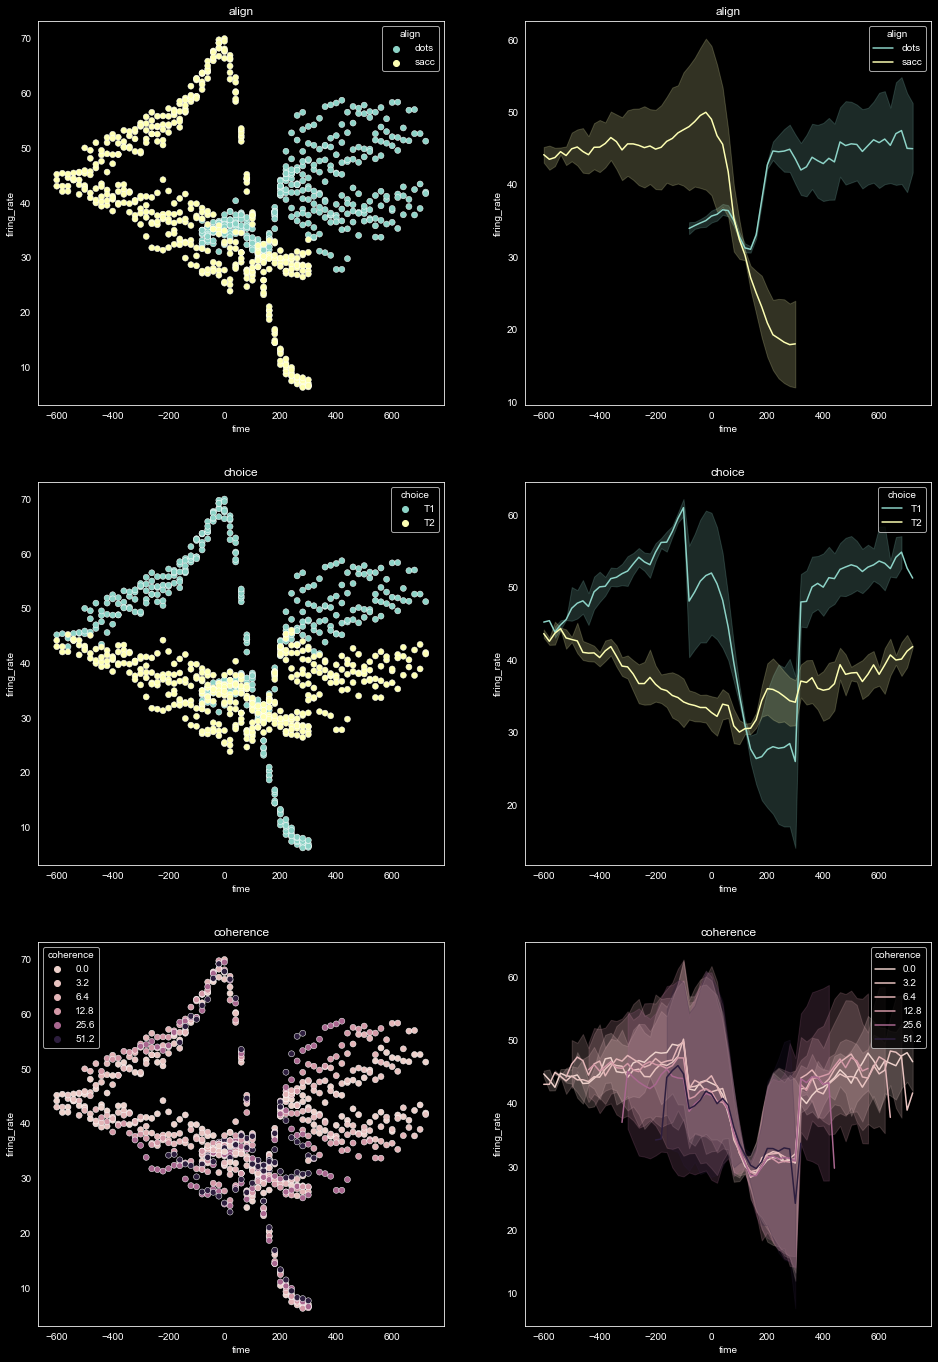

In [ ]:
cols = ["align", "choice", "coherence"]
fig, ax = plt.subplots(nrows=3, ncols=2,figsize=(16, 8*len(cols)))

for idx, col_label in enumerate(cols):
    sns.scatterplot(x="time", y="firing_rate", hue=col_label, data=df_set["dots"], ax=ax[idx][0])
    sns.lineplot(x="time", y="firing_rate", hue=col_label, data=df_set["dots"], ax=ax[idx][1])
    ax[idx][0].set_title(col_label)
    ax[idx][1].set_title(col_label)

del fig, ax

**Obsevation:**

 From the above graphs we can observe that there is some kind of relationship between the two choice firing rate and other features.
They form a kind of clusters therefore we can try to use clustering techniques to group them.

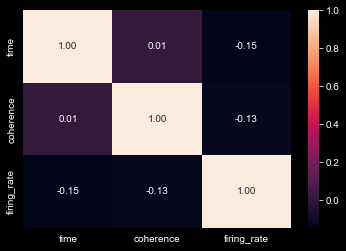

In [ ]:
cm = df_set.get('dots').corr()
sns.heatmap(cm, annot=True, fmt='.2f')

del cm

---

## Linear Regression